# AV: Bigmart Sales Prediction - Solution 8

In [41]:
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
data = pd.read_csv('Train_UWu5bXk.csv')
test = pd.read_csv("Test_u94Q5KV.csv")

In [43]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
features = ['Item_MRP']
target = ['Item_Outlet_Sales']

## Missing Values Treatment - Item_Weight

In [45]:
unique_item_identifier = data['Item_Identifier'].unique()
item_identifier_weight_dic = {x: np.NaN for x in unique_item_identifier}

for j in item_identifier_weight.iterrows():
        if not np.isnan(j[1]['Item_Weight']):
            item_identifier_weight_dic[j[1]['Item_Identifier']] = j[1]['Item_Weight']

In [46]:
data['Item_Weight'] = data['Item_Identifier']
data['Item_Weight'] = data['Item_Weight'].map(item_identifier_weight_dic)
test['Item_Weight'] = test['Item_Identifier']
test['Item_Weight'] = test['Item_Weight'].map(item_identifier_weight_dic)

In [34]:
data = data[['Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']]
data = pd.concat([data, item_identifier_weight_data], axis=1)
data = data[data['Item_Weight'] >= 0]
data.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier,Item_Weight
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,FDA15,9.30
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,DRC01,5.92
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,FDN15,17.50
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,FDX07,19.20
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,NCD19,8.93


In [38]:
data['Item_Fat_Content'].unique()

array([1, 2], dtype=int64)

In [36]:
item_fat_content_mapping = {'Low Fat': 1, 'low fat': 1, 'LF': 1, 'Regular': 2, 'reg': 2}
data['Item_Fat_Content'] = data['Item_Fat_Content'].map(item_fat_content_mapping)

In [37]:
data.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier,Item_Weight
0,1,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,FDA15,9.30
1,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,DRC01,5.92
2,1,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,FDN15,17.50
3,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,FDX07,19.20
4,1,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,NCD19,8.93


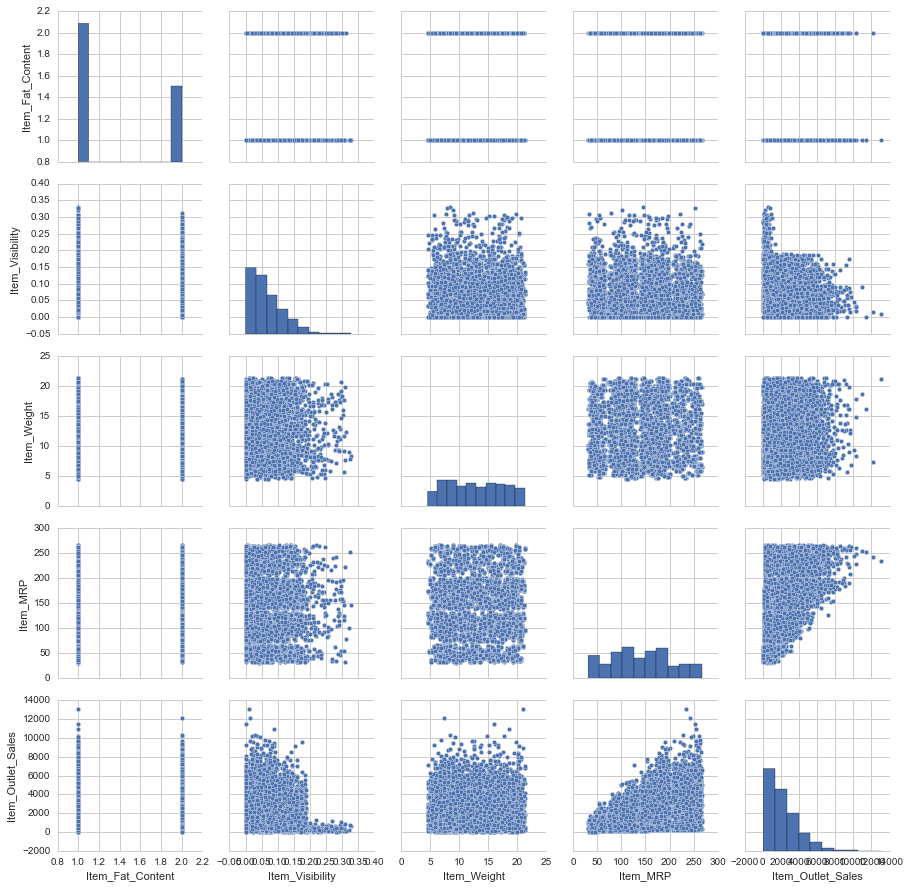

In [39]:
cols = ['Item_Fat_Content', 'Item_Visibility', 'Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']
df = data[cols]
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, size=2.5)
plt.show()